In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("../data/admittance.csv")

In [4]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [5]:
df = raw_data.copy()

In [6]:
df["Admitted"] = df["Admitted"].map({"Yes": 1, "No": 0})

In [7]:
df

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [8]:
y = df["Admitted"]
x1 = df["SAT"]

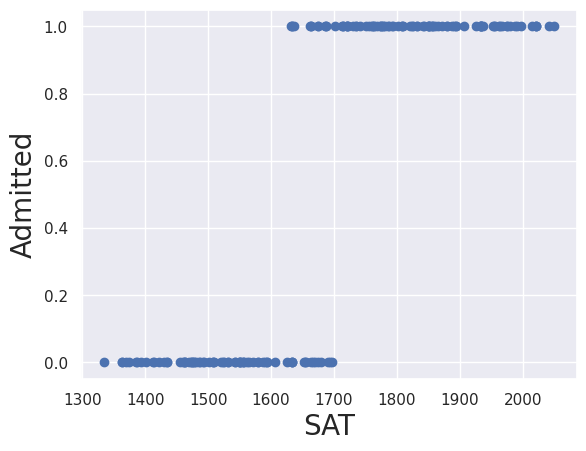

In [12]:
plt.scatter(x1, y, color="C0")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("Admitted", fontsize=20)
plt.show()


/tmp/ipykernel_53865/572394078.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1 * results_lin.params[1] + results_lin.params[0]


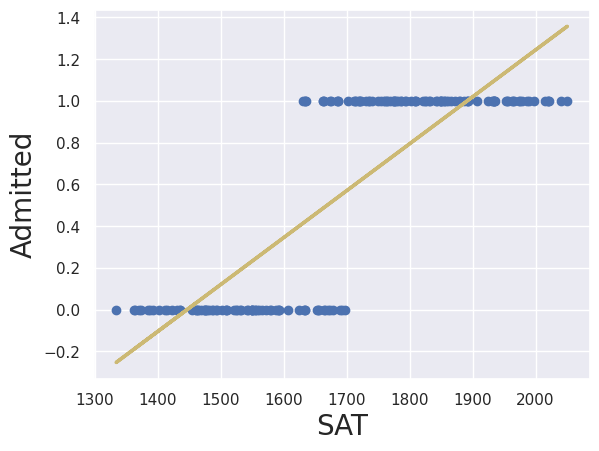

In [20]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y, x)
results_lin = reg_lin.fit()

plt.scatter(x1, y)
y_hat = x1 * results_lin.params[1] + results_lin.params[0]

plt.plot(x1, y_hat, lw=2.5, color="C8")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("Admitted", fontsize=20)
plt.show()

In [ ]:
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color="C0")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("Admitted", fontsize=20)
plt.plot(x_sorted, f_sorted, color="C8")
plt.show()

AttributeError: module 'statsmodels.api' has no attribute 'logit'